In [1]:
# coding: utf-8
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
import scipy
import sklearn
from sklearn import preprocessing
print ('Generate n = 500 samples from a Beta distribution with parameter a,b=  2, 5.')
a=2
b=5
np.random.seed(2)
#print np.random.get_state()
#raw_input()
cinq_cent_samples=np.random.beta(a, b,size=2)

print(len(cinq_cent_samples))


Generate n = 500 samples from a Beta distribution with parameter a,b=  2, 5.
2


Display the histogram of this sample with 25 bins 1


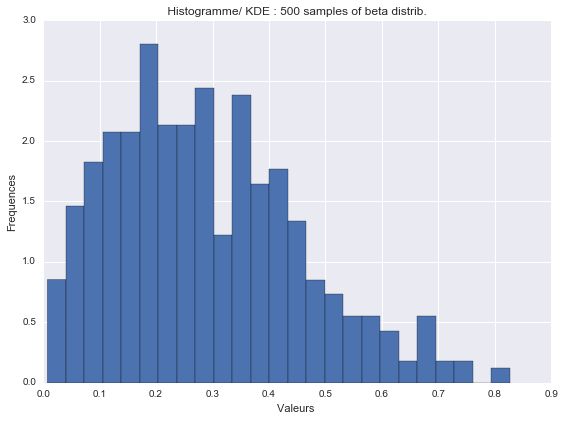

In [2]:
cinq_cent_samples=np.random.beta(a, b,size=500)
print ("Display the histogram of this sample with 25 bins 1")
fig = plt.figure(figsize=(8, 6))
plt.hist(cinq_cent_samples, bins=25, normed=True, align='mid')

#sns.kdeplot(cinq_cent_samples, shade=True, color="b")

#sns.kdeplot(panda_array_meres, shade=True, color='#9932cc')

plt.title(' Histogramme/ KDE : 500 samples of beta distrib. ' )
ax = plt.gca()
ax.legend_ = None
plt.xlabel('Valeurs '), plt.ylabel('Frequences')
plt.tight_layout()
plt.show()

In [3]:
#########################################################################################################
print ("##########################################################################################################")
print ("question 2:    Then, generate n “ 500 independent random")
print ('\n\n')
print ("vectors X i , i “ 1, . . . n, in R 2 , where all coordinates are drawn independently from a Beta")
print ("distribution with parameter pα, βq “ p2, 5q.")


##########################################################################################################
question 2:    Then, generate n “ 500 independent random



vectors X i , i “ 1, . . . n, in R 2 , where all coordinates are drawn independently from a Beta
distribution with parameter pα, βq “ p2, 5q.


In [4]:
#for a in range(500):
X=np.random.beta(a, b,size=(2,500))
print (X.shape)
print (np.mean(X,axis=1))
print (" the mean of a random variable distributed according to a beta distribution of parameters 2,5 is 2/(2+5) ~ 0.2857")

(2, 500)
[ 0.29074082  0.27897384]
 the mean of a random variable distributed according to a beta distribution of parameters 2,5 is 2/(2+5) ~ 0.2857


In [5]:
#########################################################################################################
print ("##########################################################################################################")
print ("question 3: ")



print ("Compute B = 500 bootstrap estimators of the mean.")

n=500
B=500
#Xstarbarmem = np.zeros((B,1))
cinq_cent_estimators_of_the_mean=[]
for b in range(B):
    #print np.random.randint(n, size=3)

    Xstar=X[:,np.random.randint(n, size=n)]
    #print Xstar.shape
    #print np.mean(Xstar,axis=1)
    #print 'np.mean(Xstar,axis=1)'
    cinq_cent_estimators_of_the_mean.append(np.mean(Xstar,axis=1))
print (len(cinq_cent_estimators_of_the_mean))
print (len(cinq_cent_estimators_of_the_mean[0]))

##########################################################################################################
question 3: 
Compute B = 500 bootstrap estimators of the mean.
500
2


now let us plot all that !
On the same plot, represent the observed data, the mean and the 500 bootstrap estimators of the mean.


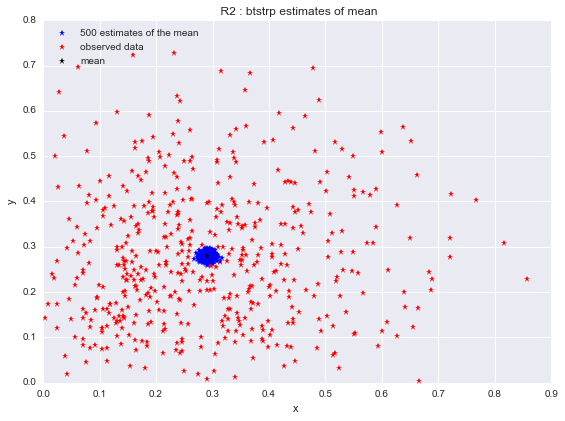

In [6]:
    
    
    print "now let us plot all that !"

    print "On the same plot, represent the observed data, the mean and the 500 bootstrap estimators of the mean."

    fig = plt.figure(figsize=(8, 6))
    for a in range(B):
        if a ==0:
            plt.plot([cinq_cent_estimators_of_the_mean[a][0]],[cinq_cent_estimators_of_the_mean[a][1]],'*', color='b', label='500 estimates of the mean')
            #plt.plot(cinq_cent_estimators_of_the_mean[a][0],cinq_cent_estimators_of_the_mean[a][1],'*', color='b', label='500 estimates of the mean')
            plt.plot([X[0][a]],[X[1][a]],'*', color='r', label='observed data')
        else:
            plt.plot([cinq_cent_estimators_of_the_mean[a][0]],[cinq_cent_estimators_of_the_mean[a][1]],'*', color='b')
            #    print "    plt.plot(cinq_cent_estimators_of_the_mean[a][0],cinq_cent_estimators_of_the_mean[a][1],'*')"
            plt.plot([X[0][a]],[X[1][a]],'*', color='r')
    plt.plot(np.mean(X,axis=1)[0],np.mean(X,axis=1)[1],'*', color='k', label='mean')
    plt.title(' R2 : btstrp estimates of mean' )
    ax = plt.gca()
    ax.legend_ = None
    plt.xlabel('x '), plt.ylabel('y')
    plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display

    plt.tight_layout()
    plt.show()


In [7]:
#########################################################################################################
print ("##########################################################################################################")
print ("question 4: ")

print "Give bootstrap estimates of the bias and the variance of the mean estimator."

print ("The bias estimate is :")
print np.mean(cinq_cent_estimators_of_the_mean,axis=0)-np.mean(X,axis=1)

print "\n"
print "mean of observed data"
print np.mean(X,axis=1)

print "et maintenant calculons la variance de l'estimateur de la moyenne par bootstrap"
print ("\n")


print np.cov(np.transpose(cinq_cent_estimators_of_the_mean),bias=1)
print "the variances are given on the diagonal, we impose the covariance to be biased to have the correct"
print "1/B factor in front of the expression of the covariance matrix"


##########################################################################################################
question 4: 
Give bootstrap estimates of the bias and the variance of the mean estimator.
The bias estimate is :
[ 0.00061256 -0.00016447]


mean of observed data
[ 0.29074082  0.27897384]
et maintenant calculons la variance de l'estimateur de la moyenne par bootstrap


[[  5.37013467e-05   5.84315940e-07]
 [  5.84315940e-07   4.62233478e-05]]
the variances are given on the diagonal, we impose the covariance to be biased to have the correct
1/B factor in front of the expression of the covariance matrix


In [8]:
print "now let us calculate some features about jack knives"

mean_jack_minus_mean_emp=[]
cinq_cent_estimators_of_the_mean_jack=[]
means_jack=[]
for b in range(B):
    
    Xstar_jack=[X[:,a]   for a in range(len(X[0])) if a!=b]
    mean_jack=np.mean(Xstar_jack,axis=0)
    means_jack.append(mean_jack)

    mean_jack_minus_mean_emp.append(mean_jack-np.mean(X,axis=1))

print "below without the (n-1)/n factor the bias part with only the sum is"
print "A = "+ np.mean(mean_jack_minus_mean_emp,axis=0).__str__()
print "\n"
print "the full jackknife bias value is given below"
print (B-1)/B*np.mean(mean_jack_minus_mean_emp,axis=0)
print "we see that multiplying by (n-1)/n<1 squeeze the last result (A) below the rounding error level"
print " le calcul montre que mathématiquement le biais du jackknife par rapport à la moyenne empirique est nul"
print " le résultat est cohérent avec cela: le niveau obtenu correspond aux erreurs d'arrondi"

print " \n la matrice suivante represente une réalisation de la matrice de covariance de l'estimateur"
print " de la moyenne selon la methode jackknife"

print (B-1)*np.cov(np.transpose(means_jack),bias=1)
print "\n de plus cette matrice est identique à la marice suivante  obtenue:  1/N* var(X)"
print np.cov(X)/B
un_sur_n_var=np.cov(X)/B
n_moins_un_cov=(B-1)*np.cov(np.transpose(means_jack),bias=1)
print "\n ...car le test suivant est vrai"

print np.isclose(n_moins_un_cov,un_sur_n_var)


now let us calculate some features about jack knives
below without the (n-1)/n factor the bias part with only the sum is
A = [ -9.10382880e-18   1.73749903e-16]


the full jackknife bias value is given below
[-0.  0.]
we see that multiplying by (n-1)/n<1 squeeze the last result (A) below the rounding error level
 le calcul montre que mathématiquement le biais du jackknife par rapport à la moyenne empirique est nul
 le résultat est cohérent avec cela: le niveau obtenu correspond aux erreurs d'arrondi
 
 la matrice suivante represente une réalisation de la matrice de covariance de l'estimateur
 de la moyenne selon la methode jackknife
[[  5.28307698e-05   2.73808140e-06]
 [  2.73808140e-06   4.35910707e-05]]

 de plus cette matrice est identique à la marice suivante  obtenue:  1/N* var(X)
[[  5.28307698e-05   2.73808140e-06]
 [  2.73808140e-06   4.35910707e-05]]

 ...car le test suivant est vrai
[[ True  True]
 [ True  True]]


In [9]:
print ("we want to compute the distance between two symmetric matrices, this distance is ")

jack_var=np.cov(X)/B
boot_var=np.cov(np.transpose(cinq_cent_estimators_of_the_mean),bias=1)
print abs(jack_var[0][0]-boot_var[0][0])+abs(jack_var[1][1]-boot_var[1][1])+abs(jack_var[0][1]-boot_var[0][1])

# to be compared to the real values of covariance of a beta distribution
print ("\n the true value of the variance of a random variable from a beta distribution of param. 2,5 is  ")
print ("\n 2.5510e-2 and dividing by B=500 we obtain 5.10204e-5   ")


we want to compute the distance between two symmetric matrices, this distance is 
5.65661943285e-06

 the true value of the variance of a random variable from a beta distribution of param. 2,5 is  

 2.5510e-2 and dividing by B=500 we obtain 5.10204e-5   


In [10]:
print ("\n #################################################################################################### \n")
print ("exercice 2")
print ("question 1")



X1=np.random.uniform(low=0.0, high=1.0, size=300)
U=np.random.uniform(low=-0.1, high=0.1, size=300)
X2=X1+U
X_uni_matrix=np.vstack((X1, X2))





 #################################################################################################### 

exercice 2
question 1


In [17]:
print ("\n #################################################################################################### \n")
print ("exercice 2")
print ("question 7")
print ("the true value of the correlation coefficient is 1/sqrt(1.04) ~ 0.98058067")
print ("\n an estimated corr. coeff. is obtained below")

#print np.corrcoef(X1,X2)
estimated_corr_coef_empiric=np.corrcoef(X1,X2)[0][1]
print estimated_corr_coef_empiric


 #################################################################################################### 

exercice 2
question 7
the true value of the correlation coefficient is 1/sqrt(1.04) ~ 0.98058067

 an estimated corr. coeff. is obtained below
0.981831579161



 #################################################################################################### 

exercice 2
question 8
 below we compute a 5% basic bootstrap confidence interval for the correlation coefficient,
for a number B = 500 of bootstrap replicas.
we compute the distribution of sqrt(n) (theta*-theta^)
 below is given the histogram of the sqrt(n) (theta*-theta^) root 


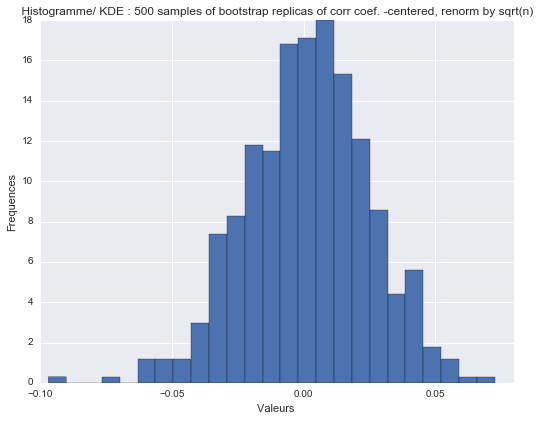

below we compute the alpha =5% quantile of sqrt(n) (theta*-theta^)
[-0.04686759  0.04496685]
the 5% basic bootstrap confidence interval therefore is
[0.979125677582,0.984427741744]


In [24]:
print ("\n #################################################################################################### \n")
print ("exercice 2")
print ("question 8")
print (" below we compute a 5% basic bootstrap confidence interval for the correlation coefficient,")
print ("for a number B = 500 of bootstrap replicas.")

n=300
B=500

cinq_cent_bootstrap_estimators_of_the_corr_coef=[]
for b in range(B):

    # the bootstrap samples are obtained just below
    Xstar=X_uni_matrix[:,np.random.randint(n, size=n)]
    X1star=Xstar[0,:]
    X2star=Xstar[1,:]
    cinq_cent_bootstrap_estimators_of_the_corr_coef.append(np.corrcoef(X1star,X2star)[0][1])

new_size=n

print ("we compute the distribution of sqrt(n) (theta*-theta^)")
corr_coef_bootstrapp_minus_estimated_renorm_by_sqrt_n=np.sqrt(new_size)*\
(cinq_cent_bootstrap_estimators_of_the_corr_coef-estimated_corr_coef_empiric)

print (" below is given the histogram of the sqrt(n) (theta*-theta^) root ")




graphe_hist_centered_renorm_sqrt_n_bootstrap_crr_coef_q8_exo2=1
if graphe_hist_centered_renorm_sqrt_n_bootstrap_crr_coef_q8_exo2:
    
    fig = plt.figure(figsize=(8, 6))
    plt.hist(corr_coef_bootstrapp_minus_estimated_renorm_by_sqrt_n, bins=25, normed=True, align='mid')
    plt.title(' Histogramme/ KDE : 500 samples of bootstrap replicas of corr coef. -centered, renorm by sqrt(n) ' )
    ax = plt.gca()
    ax.legend_ = None
    plt.xlabel('Valeurs '), plt.ylabel('Frequences')
    plt.tight_layout()
    plt.show()

print "below we compute the alpha =5% quantile of sqrt(n) (theta*-theta^)"

alpha=5 # ~ 5%  en pourcent!!!
q=[alpha/2.,100-alpha/2.]

print np.percentile(corr_coef_bootstrapp_minus_estimated_renorm_by_sqrt_n,q)
print ("the 5% basic bootstrap confidence interval therefore is")

lower_xi,upper_xi=np.percentile(corr_coef_bootstrapp_minus_estimated_renorm_by_sqrt_n,q)
borne_inf=estimated_corr_coef_empiric+lower_xi/np.sqrt(n)
borne_sup=estimated_corr_coef_empiric+upper_xi/np.sqrt(n)
print "["+borne_inf.__str__()+","+borne_sup.__str__()+"]"


In [30]:
print ("\n\n ############################################################################\n")
print ("9) Compute a 5% percentile bootstrap confidence interval for the correlation coefficient,")
print ("for a number B “ 500 of bootstrap replicas.")
print ("\n We answer this question similarly to the previous question")

#####################################
print np.percentile(cinq_cent_bootstrap_estimators_of_the_corr_coef,q)
print ("the 5% percentile bootstrap confidence interval therefore is")

lower_xi,upper_xi=np.percentile(cinq_cent_bootstrap_estimators_of_the_corr_coef,q)
borne_inf=lower_xi
borne_sup=upper_xi
print "["+borne_inf.__str__()+","+borne_sup.__str__()+"]"
print "the obtained result is suspiciously close to the one of question 8"




 ############################################################################

9) Compute a 5% percentile bootstrap confidence interval for the correlation coefficient,
for a number B “ 500 of bootstrap replicas.

 We answer this question similarly to the previous question
[ 0.97912568  0.98442774]
the 5% percentile bootstrap confidence interval therefore is
[0.979125677582,0.984427741744]




 ############################################################################

10) we compute a 5% asymp bootstrap confidence interval for the correlation coefficient,
for a number B “ 500 of bootstrap replicas.

 We answer this question similarly to the previous question
we compute the alpha quantile q of n^(1/2) (c-c0)  and then give the interval in the form of 
 c+ q/sqrt(n) so that we do not need to investigate the value of sigma in this question
we leave the research about sigma for the next question 

 this is a method close to the basic boostrap but replacing c^ (empiric estimatorof the correlation)
by c0= the known  theoretic correlation for the  studied caase 
0.980580675691
 below is given the histogram of the sqrt(n) (theta*-theta0) root 


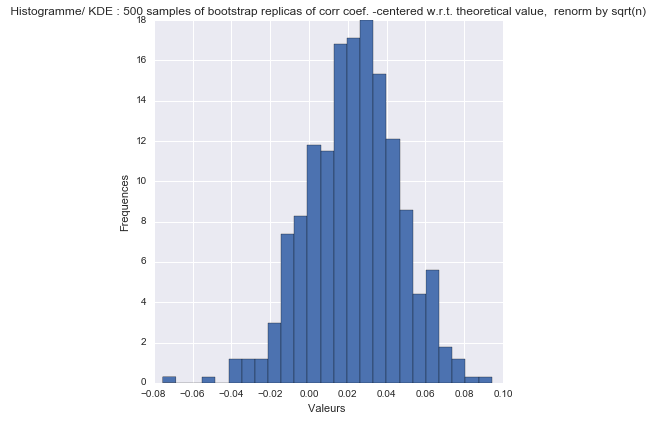

below we compute the alpha =5% quantile of sqrt(n) (theta*-theta0)
[-0.07215308  0.09283892]
the 5% basic bootstrap confidence interval therefore is
[0.977665819193,0.987191636894]


In [36]:
print ("\n\n ############################################################################\n")
print ("10) we compute a 5% asymp bootstrap confidence interval for the correlation coefficient,")
print ("for a number B “ 500 of bootstrap replicas.")
print ("\n We answer this question similarly to the previous question")

#####################################

print ("we compute the alpha quantile q of n^(1/2) (c-c0)  and then give the interval in the form of ")
print (" c+ q/sqrt(n) so that we do not need to investigate the value of sigma in this question")
print ("we leave the research about sigma for the next question ")
print ("\n this is a method close to the basic boostrap but replacing c^ (empiric estimatorof the correlation)")
print ("by c0= the known  theoretic correlation for the  studied case ")

theoretic_correlation=1/np.sqrt(1.04)
print theoretic_correlation


corr_coef_bootstrapp_minus_theo_renorm_by_sqrt_n=np.sqrt(new_size)*\
(cinq_cent_bootstrap_estimators_of_the_corr_coef-theoretic_correlation)

print (" below is given the histogram of the sqrt(n) (theta*-theta0) root ")




graphe_hist_centered_renorm_sqrt_n_bootstrap_crr_coef_q10_exo2=1
if graphe_hist_centered_renorm_sqrt_n_bootstrap_crr_coef_q10_exo2:
    
    fig = plt.figure(figsize=(8, 6))
    plt.hist(corr_coef_bootstrapp_minus_theo_renorm_by_sqrt_n, bins=25, normed=True, align='mid')
    plt.title(' Histogramme/ KDE : 500 samples of bootstrap replicas of corr coef. -centered w.r.t. theoretical value,'\
            +'  renorm by sqrt(n) ' )
    ax = plt.gca()
    ax.legend_ = None
    plt.xlabel('Valeurs '), plt.ylabel('Frequences')
    plt.tight_layout()
    plt.show()

print "below we compute the alpha =5% quantile of sqrt(n) (theta*-theta0)"

#alpha=5 # ~ 5%  en pourcent!!!
q=[alpha/2.,100-alpha/2.]

print np.percentile(corr_coef_bootstrapp_minus_theo_renorm_by_sqrt_n,q)
print ("the 5% basic bootstrap confidence interval therefore is")

lower_xi,upper_xi=np.percentile(corr_coef_bootstrapp_minus_theo_renorm_by_sqrt_n,q)
borne_inf=estimated_corr_coef_empiric+lower_xi/np.sqrt(n)
borne_sup=estimated_corr_coef_empiric+upper_xi/np.sqrt(n)
print "["+borne_inf.__str__()+","+borne_sup.__str__()+"]"




In [ ]:

print ("\n\n ############################################################################\n")
print ("11) By means of simulation (use for instance M “ 2000 repetitions of the experiment with"+\
"a Monte-Carlo approach), evaluate the coverage probability associated to each method :"+\
"basic (in question 8), percentile (in question 9) and asymptotic-jackknife (in question 10)." 

#In statistics, the coverage probability of a confidence interval is the proportion of the time that the interval contains the true value of interest.